This notebook now replaces everything we did in manually and semi-manully in the previous
two nodebooks. We will use

1. PyTorch Models for prediction
2. Autograd for gradient computation
3. PyTorch Loss for loss computation
4. PyTorch Optimizer for parameter updates

A PyTorch Pipeline has three steps:

1. Design a model (input_size, output_size, forward_pass)
2. Construct the loss and optimizer
3. Training loop
 - forward pass: compute prediction and loss
 - backward pass: gradients
 - update the weights
 
 For all the above pipeline steps, we use PyTorch classes and methods 

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

### Step 0. Prepare data

Create tensors from our numpy dataset returned from sklearn 

In [2]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
# Reshape y
y = y.view(y.shape[0], 1)
n_samples, n_features = X.shape
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')
print(f'samples: {n_samples}; features: {n_features}')

X shape: torch.Size([100, 1])
y shape: torch.Size([100, 1])
samples: 100; features: 1


### Step 1. Design the model

In [3]:
input_size = n_features
output_size = 1
# Create a linear model
model = nn.Linear(input_size, output_size)

### Step 2. Construct loss and optimizer

In [4]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Step 4. Train loop

In [5]:
%matplotlib inline

epoch: 1,  loss: 5714.723145
epoch: 11,  loss: 4229.974121
epoch: 21,  loss: 3157.661621
epoch: 31,  loss: 2382.289307
epoch: 41,  loss: 1821.005737
epoch: 51,  loss: 1414.278809
epoch: 61,  loss: 1119.266968
epoch: 71,  loss: 905.096558
epoch: 81,  loss: 749.488586
epoch: 91,  loss: 636.345032


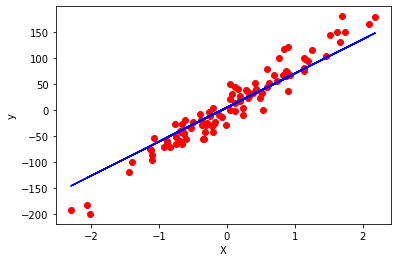

In [6]:
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass: compute gradients
    loss.backward()
    
    # Update the weights
    optimizer.step()
    
    # zero out the gradients computed in the backward pass as it sums
    # in a list property .grad
    optimizer.zero_grad()
    
    # print some status and progress
    if epoch % 10 == 0:
        print(f'epoch: {epoch + 1},  loss: {loss.item():4f}')
        
# Plot
# detach the X from the computed DAG
predicted = model(X).detach().numpy()

# X and Y labels
plt.xlabel('X')
plt.ylabel('y')

plt.plot(X_numpy, y_numpy, 'ro', label='X,y')
plt.plot(X_numpy, predicted, 'b', label='y_predicted')  